In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("Assignment-1_Data.csv", sep=';')

In [3]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [4]:
df.shape

(522064, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
df['Price']=df['Price'].str.replace(',','.')
df['Price']=df['Price'].astype(float)

In [7]:
df['Date']=pd.to_datetime(df['Date'])
today='01-01-2012'
today=pd.to_datetime(today)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [9]:
# Recency
df_r=df.groupby(by='CustomerID').agg({'Date': lambda x: (today-x.max()).days})
df_r.columns=['Recency']

In [10]:
df_r.head()

,Recency
CustomerID,
12346.0,347
12347.0,61
12349.0,40
12350.0,332
12352.0,94


In [11]:
# Frequency
df_f=df.drop_duplicates('BillNo').groupby(by=['CustomerID'])[['BillNo']].count()
df_f.columns=['Frequency']

In [12]:
df_f.head()

,Frequency
CustomerID,
12346.0,1
12347.0,7
12349.0,1
12350.0,1
12352.0,8


In [13]:
# Monetary
df['Total Price']=df['Quantity']*df['Price']
df_m=df.groupby(by=['CustomerID'])[['Total Price']].sum()
df_m.columns=['Monetary']

In [14]:
df_m.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12349.0,1757.55
12350.0,334.40
12352.0,2506.04


In [15]:
df_rfm=pd.concat([df_r,df_f,df_m], axis=1)

In [16]:
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,61,7,4310.00
12349.0,40,1,1757.55
12350.0,332,1,334.40
12352.0,94,8,2506.04


In [17]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,4297.000000,4297.000000,4297.000000
mean,126.545264,4.227368,1993.140888
std,115.234387,7.091298,8588.143093
min,21.000000,1.000000,0.000000
25%,43.000000,1.000000,306.720000
50%,82.000000,2.000000,668.580000
75%,183.000000,5.000000,1652.580000
max,718.000000,210.000000,280206.020000


In [18]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()
rfm_scaled=ss.fit_transform(df_rfm)

In [20]:
rfm_scaled

array([[ 1.91332117, -0.45516961,  8.75616638],
       [-0.56886572,  0.39103625,  0.26980556],
       [-0.75112419, -0.45516961, -0.0274353 ],
       ...,
       [ 0.9586339 , -0.3141353 , -0.21137307],
       [-0.82923497,  1.66034504,  0.01184784],
       [-0.91602472, -0.17310099, -0.01815049]])

In [21]:
# Hierarchial clustering
import scipy.cluster.hierarchy as shc

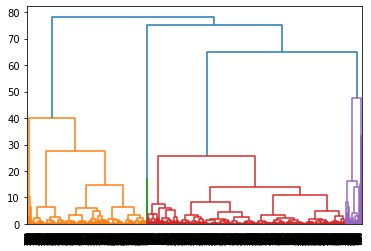

In [22]:
dendrogram=shc.dendrogram(shc.linkage(rfm_scaled, method='ward'))

In [23]:
# Let's first try with three clusters
from sklearn.cluster import AgglomerativeClustering
ahc=AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='ward')
ahc.fit(rfm_scaled)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [24]:
ahc.fit_predict(rfm_scaled)

array([0, 3, 3, ..., 1, 0, 3])

In [25]:
df_rfm["Cluster_No_AHC"] = (ahc.labels_ + 1)

In [26]:
df_rfm.head()

,Recency,Frequency,Monetary,Cluster_No_AHC
CustomerID,,,,
12346.0,347,1,77183.60,1
12347.0,61,7,4310.00,4
12349.0,40,1,1757.55,4
12350.0,332,1,334.40,2
12352.0,94,8,2506.04,4


In [27]:
df_rfm.groupby(["Cluster_No_AHC"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster_No_AHC,,,
1,38.044335,24.980296,14785.728177
2,248.889033,1.775470,575.391578
3,47.500000,45.500000,225721.652500
4,59.754413,3.992154,1480.368200


In [28]:
df_rfm.groupby(["Cluster_No_AHC"])[["Recency", "Frequency", "Monetary"]].median()

,Recency,Frequency,Monetary
Cluster_No_AHC,,,
1,32.0,19.0,8052.970
2,225.0,1.0,354.800
3,28.5,53.0,227104.045
4,51.0,3.0,933.620


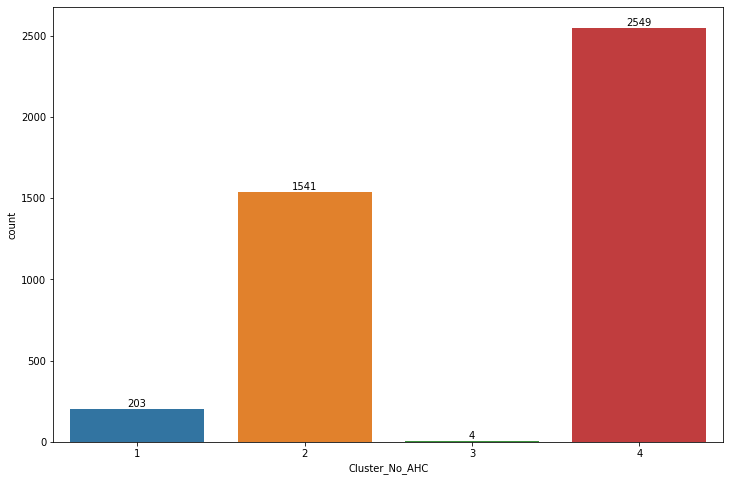

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
ax=sns.countplot(df_rfm['Cluster_No_AHC'])
for bars in ax.containers:
    ax.bar_label(bars)

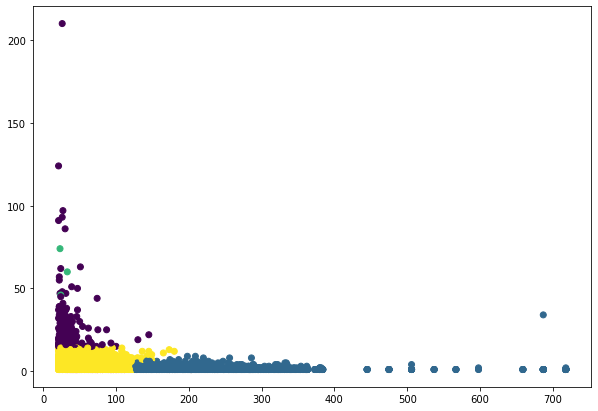

In [30]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_rfm['Recency'], df_rfm['Frequency'], c=ahc.labels_) 

In [31]:
# K-means clustering
from sklearn.cluster import KMeans
kmc=KMeans(n_clusters=4, random_state=2).fit(rfm_scaled)

In [32]:
kmc.fit_predict(rfm_scaled)

array([3, 0, 0, ..., 1, 0, 0], dtype=int32)

In [33]:
df_rfm["Cluster_No_KMC"] = (kmc.labels_ + 1)

In [34]:
df_rfm.head()

,Recency,Frequency,Monetary,Cluster_No_AHC,Cluster_No_KMC
CustomerID,,,,,
12346.0,347,1,77183.60,1,4
12347.0,61,7,4310.00,4,1
12349.0,40,1,1757.55,4,1
12350.0,332,1,334.40,2,2
12352.0,94,8,2506.04,4,1


In [35]:
df_rfm.groupby(["Cluster_No_KMC"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster_No_KMC,,,
1,70.042979,4.245079,1616.191018
2,283.486979,1.544271,492.448352
3,47.200000,40.600000,205560.228000
4,37.619565,35.260870,22209.505761


In [36]:
df_rfm.groupby(["Cluster_No_KMC"])[["Recency", "Frequency", "Monetary"]].median()

,Recency,Frequency,Monetary
Cluster_No_KMC,,,
1,59.0,3.0,911.205
2,263.5,1.0,316.180
3,33.0,46.0,194550.790
4,31.0,28.0,14673.630


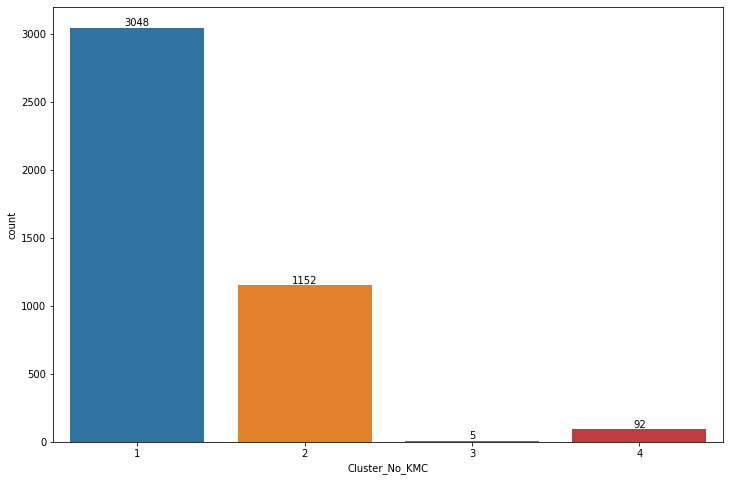

In [37]:
plt.figure(figsize=(12,8))
ax=sns.countplot(df_rfm['Cluster_No_KMC'])
for bars in ax.containers:
    ax.bar_label(bars)

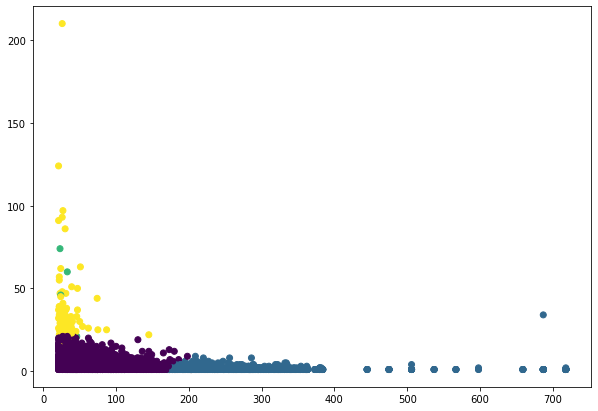

In [38]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_rfm['Recency'], df_rfm['Frequency'], c=kmc.labels_) 